- 지금까지 지도 학습과 비지도 학습 이론을 다루면서 다양한 머신러닝 알고리즘을 살펴봤음
- 비지도 학습 모델을 평가하고 선택하는 일은 매우 정성적인 작업이므로 여기서는 지도 학습인 회귀와 분류에 집중할 것
- 지도 학습 모델을 평가하기 위해 train_test_split 함수를 사용하여 데이터셋을 훈련 세트와 테스트 세트로 나눴음
- 그리고 모델을 만들기 위해 훈련 세트에 fit 메서드를 적용했고, 모델을 평가하기 위해 테스트 세트에 score 메서드를 사용
- 분류에서 score 메서드는 정확히 분류된 샘플의 비율을 계싼하는 역할을 함

In [8]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듦
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킴
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


- 데이터를 훈련 세트와 테스트 세트로 나누는 이유는 지금까지 본 적 없는 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정하기 위해서임
- 모델이 훈련 세트에 잘 맞는 것보다, 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요
- 두 가지 관점에서 이 평가 방법을 확장. 먼저 안정적인 일반화 성능 측정 방법인 교차 검증을 소개하고, score 메서드가 제공하는 정확도와 R^2 값 이외에 분류와 회귀 성능을 측정하는 다른 방법을 알아보겠음
- 또한 가장 좋은 일반화 성능을 얻기 위해서 지도 학습 모델의 매개변수를 조정하는 데 유용한 그리드 서치에 관해서도 알아봄

# 1. 교차검증 (Cross-Validation)


- 교차 검증은 일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 통계적 평가 방법
- 교차 검증에서는 데이터를 여러 번 반복해서 나누고 여러 모델을 학습
- 가장 널리 사용되는 교차 검증 방법은 k-겹 교차 검증 (k-foldcorss-validation)으로 k는 특정 숫자인데 보통 5 또는 10을 사용
- 5-겹 교차 검증을 하려면 데이터를 먼저 폴드(fold)하는 (거의) 비슷한 크기의 '부분 집합' 다섯 개로 나눔
- 그다음 일련의 모델들을 만듦. 첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고 나머지(2에서 5까지) 폴드를 훈련 세트로 사용하여 학습함
- 즉 이 모델은 폴드 2~5까지의 데이터를 사용해 만들어지고 폴드 1을 사용해 정확도를 평가함
- 그 다음 두 번째 모델은 폴드 2를 테스트 세트로 사용하고 폴드 1, 3, 4, 5의 데이터를 훈련 데이터로 사용함
- 이런 방법으로 폴드 3, 4, 5를 테스트 세트로 사용해 반복
- 이렇게 데이터를 훈련 세트와 테스트 세트로 나누는 다섯 번의 분할마다 정확도를 측정하여, 결국 다섯 개의 정확도 값을 얻게 됨

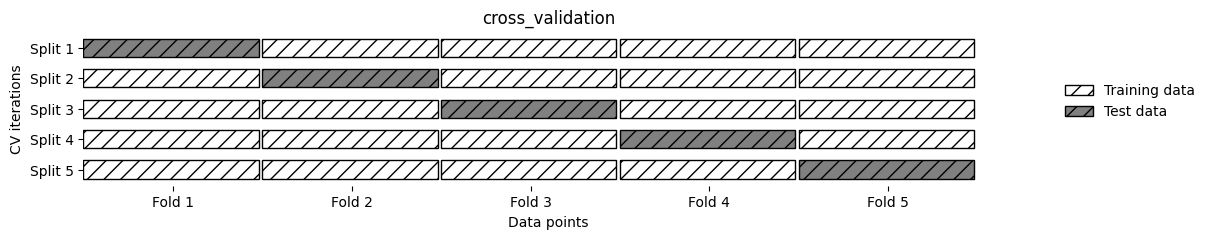

In [9]:
import mglearn

# 5-겹 교차 검증에서의 데이터 분할
mglearn.plots.plot_cross_validation()

- 보통 데이터의 첫 번째 1/5 조각이 첫 번째 폴드이고 두 번째 1/5 조각이 두 번째 폴드가 되는 식

## 1-1. scikit-learn의 교차 검증
- scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현되어 있음
- cross_val_score 함수의 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블임

In [10]:
# iris 데이터셋에 적용한 LogisticRegression을 평가
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


- 여기서는 corss_val_score가 5-겹 교차 검증을 수행했기 때문에 5개의 점수가 반환되었음
- 폴드의 수는 cv 매개변수를 사용해서 바꿀 수 있음

In [11]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores)

교차 검증 점수: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


- 적어도 5-겹 교차 검증 정도를 사용하는 것이 좋음
- 보통 교차 검증의 정확도를 간단하게 나타내려면 평균을 사용

In [12]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


- 교차 검증 평균값으로 우리는 이 모델의 정확도가 대략 97%로 기대됨
- 10-겹 교차 검증이 만든 다섯 개의 값을 모두 보면 100%에서 93%까지 폴드에 따라 비교적 파이가 큼
- 이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문일 수 있음
- 교차 검증에 cross_validate 함수를 사용할 수도 있음
- 이 함수는 cross_val_score 함수와 인터페이스가 비슷하지만 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환 (테스트 점수는 물론 설정에 따라 훈련 점수도 얻을 수 있음)

In [13]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.0094943 , 0.04058218, 0.03390384, 0.09384131, 0.02403831]),
 'score_time': array([0.00099802, 0.0009973 , 0.00099659, 0.00150752, 0.00157762]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [16]:
# 팬더스를 사용하여 결과값을 출력하고 평균을 계산
res_df = pd.DataFrame(res)
res_df
print("평균 시간과 점수:\n", res_df.mean())

평균 시간과 점수:
 fit_time       0.040372
score_time     0.001215
test_score     0.973333
train_score    0.975000
dtype: float64


## 1-2. 교차 검증의 장점
- 데이터를 훈련 세트와 테스트 세트로 한 번 나누는 것보다 교차 검증을 사용하면 몇 가지 장점이 있음
- 먼저 train_test_split는 데이터를 무작위로 나눔
- 데이터를 무작위로 나눌 때 운 좋게 훈련 세트에는 분류하기 어려운 샘플만 담기게 되었다고 가정, 이 경우 테스트 세트에는 분류하기 쉬운 샘플만 들어 있어서 테스트 세트의 정확도는 비현실적으로 높게 나올 것
- 반대로 운 나쁘게 분류하기 어려운 샘플들이 모두 테스트 세트에 들어간다면 정확도가 아주 낮게 나올 것
- 그러나 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어감
- 각 샘플은 폴드 중 하나에 속하며 각 폴드는 한 번씩 테스트 세트가 됨
- 그렇기 때문에 교차 검증의 점수와 평균값을 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야 함
- 또 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알 수 있음
- iris 데이터셋에서 90~100%의 정확도를 얻었음
- 이 범위는 꽤 넓으며 새로운 데이터를 적용했을 때 최악의 경우와 최선의 경우를 짐작할 수 있게 함
- 교차 검증의 또 다른 장점은 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용할 수 있다는 점
- train_test_split를 사용하면 보통 데이터 중 75%를 훈련 세트로 사용하고 25%를 평가에 사용
- 5-ruq 교차 검증을 사용하면 매 반복에서 4/5의 데이터, 즉 80%를 모델 학습에 사용
- 10-겹 교차 검증이라면 데이터의 9/10인 90%를 모델 학습에 사용
- 많은 데이터는 보통 더 정확한 모델을 만들어냄
- 교차 검증의 주요 단점은 연산 비용이 늘어난다는 것
- 모델을 k개 만들어야 하므로 데이터를 한 번 나눴을 때보다 대략 k배 더 느림
- 교차 검증은 새로운 데이터에 적용할 모델을 만드는 방법이 아니라, 교차 검증 함수는 모델을 반환하지 않음
- cross_val_score 함수를 호출하면 내부적으로 여러 모델이 만들어지지만, 교차 검증의 목적은 단지 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 평가하는 것

## 1-3. 계층별 k-겹 교차 검증과 그 외 전략들
- 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것이 항상 좋지는 않음
- iris 데이터셋으로 예를 듦

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 결과에서 볼 수 있듯이 첫 번째 1/3은 클래스 0, 두 번째 1/3은 클래스 1이고 마지막 1/3은 클래스 2임
- 이 데이터에 3-겹 교차 검증을 적용한다고 생각해봄, 첫 번째 폴드는 클래스 0만 가지고 있으므로, 첫 번째 반복에서 테스트 세트는 클래스 0만을, 훈련 세트는 클래스 1과 2만을 가지게 됨
- 세 번의 반복 모두 훈련 세트와 테스트 세트의 클래스가 다르므로 이 데이터셋에서 3-겹 교차 검증의 정확도는 0이 됨
- iris 데이터셋에서 0%보다는 높은 정확도가 나와야 하므로 이 방법은 잘못되었음
- 단순히 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증(Stratified k-fold cross-validation)을 사용함
- 계층별 교차 검증에서는 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔

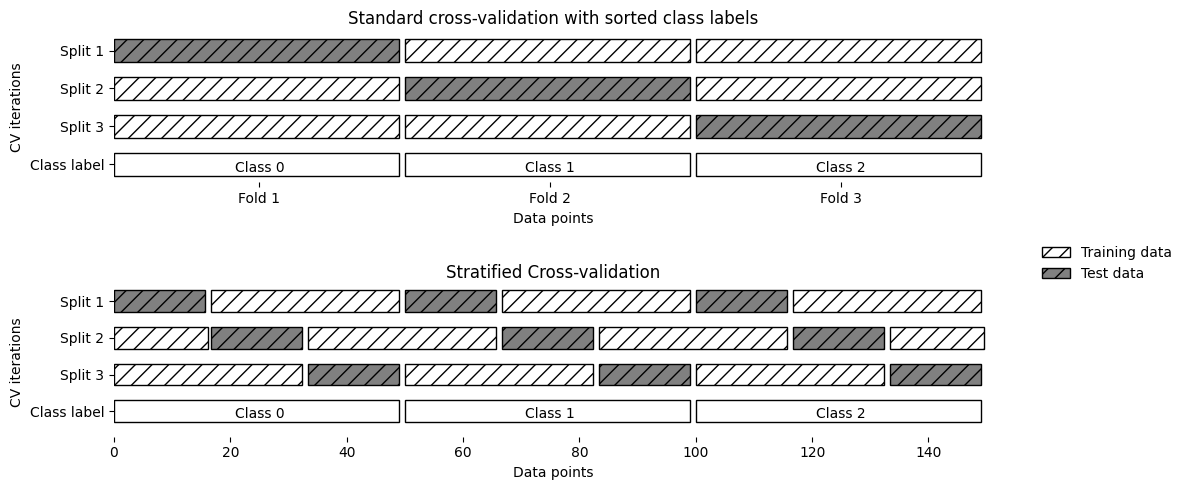

In [19]:
# 클래스 레이블 순서대로 정렬된 데이터에서 기본 교차 검증과 계층별 교차 검증의 비교
mglearn.plots.plot_stratified_cross_validation()

- 예를 들어 샘플의 90%가 클래스 A이고 10%가 클래스 B에 속한다면, 계층별 교차 검증은 각 폴드에 클래스 A 샘플이 90%, 클래스 B 샘플이 10%가 되도록 만듦
- 분류기의 일반화 성능을 측정할 때 k-겹 교차 검증보다 더 안정적인 계층별 k-겹 교차 검증을 사용하는 것이 좋음
- 클래스 B에 속한 샘플이 10% 정도라면 기본 k-겹 교차 검증에서는 클래스 A 샘플만 가진 폴드가 생기기 쉬움
- 이런 폴드를 테스트 세트로 사용하면 분류기의 전체 성능을 크게 왜곡하게 됨
- scikit-learn은 회귀에서 기본 k-겹 교차 검증을 사용
- 회귀에서도 폴드가 서로 다른 타깃 값을 포함하도록 만들 수 있지만, 대부분 사용자에게는 생소한 일이며 일반적으로 사용하는 방법은 아님

### 교차 검증 상세 옵션
- 앞서 cross_val_score를 사용할 때 cv 매개변수를 이용해 폴드의 개수를 조정해보았음
- 그러나 scilit-learn에서는 cv 매개변수에 교차 검증 분할기 (Cross-Validation Splitter)를 전달함으로써 데이터를 분할할 때 더 세밀하게 제어할 수 있음
- 